In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
from marvin.tools.cube import Cube


[INFO]: No release version set. Setting default to DR15


In [2]:

with fits.open('./data2/galaxies_sorted.fits') as hdulist:
    jelly = hdulist[1].data['plateifu']
    
with fits.open('./data2/manga_firefly-v2_4_3-STELLARPOP.fits') as fin:
    plateifus = fin['GALAXY_INFO'].data['PLATEIFU']
    spaxel_binid = fin['SPATIAL_BINID'].data
    mstar_all = fin['SURFACE_MASS_DENSITY_VORONOI'].data

In [3]:

gal = jelly[0]
# Select galaxy and binids
ind1 = np.where(plateifus == gal)[0][0]
ind_binid = spaxel_binid[ind1, :, :, 0].astype(int)

# Create 2D stellar mass array
mstar = np.ones(ind_binid.shape) * np.nan
for row, inds in enumerate(ind_binid):
    ind_nans = np.where(inds == -99)
    mstar[row] = mstar_all[ind1, inds, 0]
    mstar[row][ind_nans] = np.nan
    
# trim mstar to match size of DAP maps and write to csv
cube = Cube(gal)
len_x = int(cube.header['NAXIS1'])
mdens = mstar[:len_x, :len_x]
mdens_ma = np.ma.array(data=mdens, mask=mdens==-9999.)
plt.imshow(mdens_ma)


IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [3]:
import mass_dens_mapext
gal = jelly[0]
massmap = mass_dens_mapext.get_massmap(gal)
plt.imshow(massmap)
plt.colorbar()

Sentry responded with an error: <urlopen error timed out> (url: https://sentry.io/api/107924/store/)
Traceback (most recent call last):
  File "/Users/mlang/miniforge3/envs/py39/lib/python3.9/urllib/request.py", line 1346, in do_open
    h.request(req.get_method(), req.selector, req.data, headers,
  File "/Users/mlang/miniforge3/envs/py39/lib/python3.9/http/client.py", line 1255, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Users/mlang/miniforge3/envs/py39/lib/python3.9/http/client.py", line 1301, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Users/mlang/miniforge3/envs/py39/lib/python3.9/http/client.py", line 1250, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Users/mlang/miniforge3/envs/py39/lib/python3.9/http/client.py", line 1010, in _send_output
    self.send(msg)
  File "/Users/mlang/miniforge3/envs/py39/lib/python3.9/http/client.py", line 950, in send
    se

BrainError: No URL Map found. Cannot make remote call

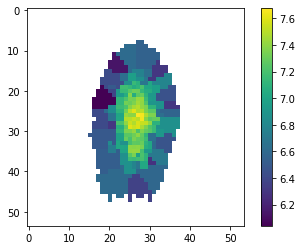

In [5]:
import mass_mapext
gal = jelly[0]
massmap = mass_mapext.get_massmap(gal)
plt.imshow(massmap)
plt.colorbar()

In [5]:
import jf
a = jf.Mymaps(plateifu=jelly[0],max_radii=1.5)

[WARNING]: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead (DeprecationWarning)


In [6]:
print(a.get_mass())
# a.nsa['z']

9.54342987209928


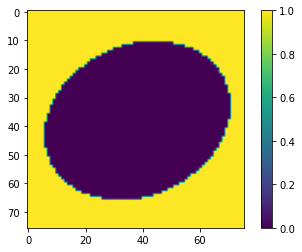

In [52]:
plt.imshow(a.spx_ellcoo_r_re.value>1.5)
plt.colorbar()

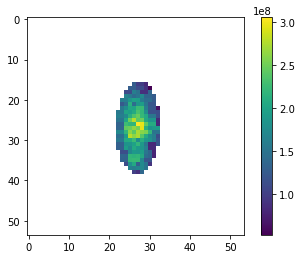

In [45]:
plt.imshow(a.get_mass_map_fromdens())
plt.colorbar()

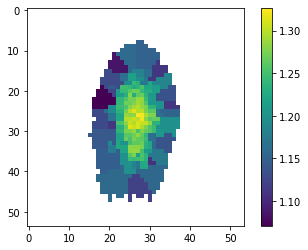

In [7]:
massmap = a.get_mass_map()
plt.imshow(massmap)
plt.colorbar()

In [8]:
np.log10(np.ma.sum(np.power(massmap,10)))

3.5791783464960556

In [7]:
jelly[0]

'8944-6101'

In [9]:
pipe3d_test = fits.open('manga-8944-6101.Pipe3D.cube.fits')
hdu0 = pipe3d_test[0]

None


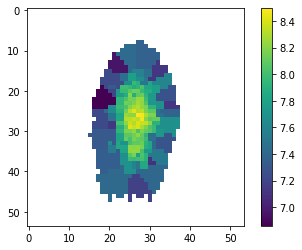

In [9]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
from marvin.tools.cube import Cube
import pandas as pd

with fits.open('./data2/manga_firefly-v2_4_3-STELLARPOP.fits')as fin:
    firefly_plateifus = fin['GALAXY_INFO'].data['PLATEIFU']
    spaxel_binid = fin['SPATIAL_BINID'].data
    mstar_all = fin['SURFACE_MASS_DENSITY_VORONOI'].data
    spa_info = fin['SPATIAL_INFO'].data

def get_massmap(gal):
    # Select galaxy and binids
    ind1 = np.where(firefly_plateifus == gal)[0][0]
    ind_binid = spaxel_binid[ind1, :, :].astype(int)
    cells_binid = spa_info[ind1,:,0]

    # Create 2D stellar mass array
    mstar = np.ones(ind_binid.shape) * np.nan
    for row, inds in enumerate(ind_binid):
        inds[inds==-1]=-9999
        ind_nans = np.where(np.logical_or(inds==-1,inds==-9999))
        # print(inds)
        cells=[]
        for i in inds:
            cells.append(np.where(cells_binid==(i+0.0))[0][0])
        mstar[row] = mstar_all[ind1, cells, 0]
        mstar[row][ind_nans] = 0.0
        
    # trim mstar to match size of DAP maps 
    cube = Cube(gal)
    len_x = int(cube.header['NAXIS1'])
    mdens = mstar[:len_x, :len_x]
    mdens_ma = np.ma.array(data=mdens, mask=mdens==0.0)
    return mdens_ma
map_test = get_massmap(jelly[0])
plt.imshow(map_test)
plt.colorbar()


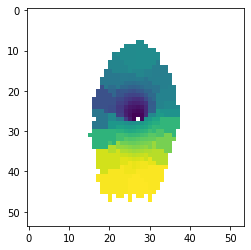

In [34]:
spaxel_binid_dis = spaxel_binid[np.where(firefly_plateifus == jelly[0])[0][0]].copy()
spaxel_binid_dis[spaxel_binid_dis==-1]=0
spaxel_binid_dis[spaxel_binid_dis==-9999]=0

cube = Cube(jelly[0])
len_x = int(cube.header['NAXIS1'])
spaxel_binid_dis = spaxel_binid_dis[:len_x, :len_x]
spaxel_binid_dis_ma = np.ma.array(data=spaxel_binid_dis, mask=spaxel_binid_dis==0.0)
plt.imshow(spaxel_binid_dis_ma)

In [10]:
mstar_all[0,:,0]

array([ 7.6116982e+00,  6.9560771e+00,  7.5136614e+00, ...,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03], dtype=float32)

In [15]:
import mass_sum
mass_sum.get_mass(jelly[0])

[WARNING]: overflow encountered in power (RuntimeWarning)


10.828233

In [6]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
from marvin.tools.cube import Cube
import pandas as pd

with fits.open('./data2/manga_firefly-v2_4_3-STELLARPOP.fits')as fin:
    firefly_plateifus = fin['GALAXY_INFO'].data['PLATEIFU']
    spaxel_binid = fin['SPATIAL_BINID'].data
    mstar_all = fin['STELLAR_MASS_VORONOI'].data
    spa_info = fin['SPATIAL_INFO'].data


ind1 = np.where(firefly_plateifus == jelly[0])[0][0]
mass_cell = mstar_all[ind1, :, 0]
mass_cell[mass_cell<0]=0.0
mass_list = np.ma.array(data=mass_cell, mask = mass_cell==0.0)
print(mass_list)
mass = np.log10(np.ma.sum(10**mass_list))
mass

[7.514454364776611 7.647073268890381 7.583356857299805 ... -- -- --]


9.4858675

In [102]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
from marvin.tools.cube import Cube
import pandas as pd

with fits.open('./data2/manga_firefly-v2_4_3-STELLARPOP.fits')as fin:
    firefly_plateifus = fin['GALAXY_INFO'].data['PLATEIFU']
    spaxel_binid = fin['SPATIAL_BINID'].data
    mstar_all = fin['STELLAR_MASS_VORONOI'].data
    spa_info = fin['SPATIAL_INFO'].data


ind1 = np.where(firefly_plateifus == jelly[0])[0][0]
mass_cell = mstar_all[ind1, :, 0]
mass_cell[mass_cell<0]=0.0
mass_list = np.ma.array(data=mass_cell, mask = mass_cell==0.0)
print(mass_list)
mass = np.log10(np.ma.sum(np.power(mass_list,10)))
mass

[7.514454364776611 7.647073268890381 7.583356857299805 ... -- -- --]


10.828233

In [32]:
# bin number map
spin = spaxel_binid[1539]
np.savetxt('/Users/mlang/Desktop/jellydebug/spin.dat', spin)
spin_flat = spin.flatten()
bins = np.unique(spin_flat)
bins

array([-9999,    -1,     0,     1,     2,     3,     4,     5,     6,
           7,     8,     9,    10,    11,    12,    13,    14,    15,
          16,    17,    18,    19,    20,    21,    22,    23,    24,
          25,    26,    27,    28,    29,    30,    31,    32,    33,
          34,    35,    36,    37,    38,    39,    40,    41,    42,
          43,    44,    45,    46,    47,    48,    49,    50,    51,
          52,    53,    54,    55,    56,    57,    58,    59,    60,
          61,    62,    63,    64,    65,    66,    67,    68,    69,
          70,    71,    72,    73,    74,    75,    76,    77,    78,
          79,    80,    81,    82,    83,    84,    85,    86,    87,
          88,    89,    90,    91,    92,    93,    94,    95,    96,
          97,    98,    99,   100,   101,   102,   103,   104,   105,
         106,   107,   108,   109,   110,   111,   112,   113,   114,
         115,   116,   117,   118,   119,   120,   121,   122,   123,
         124,   125,

In [73]:
np.unique(mstar_all[1539,:,0])

array([0.       , 6.040251 , 6.1345344, 6.2780232, 6.2973256, 6.298436 ,
       6.3051143, 6.361841 , 6.3843694, 6.4106073, 6.418618 , 6.451169 ,
       6.4638896, 6.49462  , 6.50435  , 6.5258565, 6.551771 , 6.5647964,
       6.589251 , 6.596498 , 6.6025724, 6.6094556, 6.61535  , 6.630308 ,
       6.6360874, 6.6375175, 6.6389575, 6.640362 , 6.668625 , 6.6818514,
       6.682342 , 6.7015347, 6.73172  , 6.7635174, 6.778313 , 6.7876863,
       6.833539 , 6.8376756, 6.8502007, 6.853118 , 6.8609095, 6.862785 ,
       6.864762 , 6.8667154, 6.8707495, 6.8712387, 6.896028 , 6.91078  ,
       6.911086 , 6.9269724, 6.9390173, 6.946876 , 6.957389 , 6.965492 ,
       6.977762 , 6.980487 , 6.9966516, 7.0003266, 7.0044913, 7.0082183,
       7.011439 , 7.012677 , 7.017412 , 7.027782 , 7.0506077, 7.052992 ,
       7.055424 , 7.0596056, 7.0626235, 7.064548 , 7.080347 , 7.093972 ,
       7.0980463, 7.0997977, 7.099988 , 7.1016665, 7.1019573, 7.1064935,
       7.1072702, 7.111535 , 7.11889  , 7.119434 , 

In [80]:
spa_info[1539][:,0]

array([ 0.000e+00,  5.000e+00,  9.700e+01, ..., -9.999e+03, -9.999e+03,
       -9.999e+03], dtype=float32)

In [68]:
hdu = fits.open('./data2/manga_firefly-v2_4_3-STELLARPOP.fits')
PLATEIFU_all = hdu[1].data['PLATEIFU']

my_galaxy = np.where(PLATEIFU_all=='0')[0]
# my_galaxy
hdu['SPATIAL_INFO'].data[my_galaxy]

[WARNING]: unclosed file <_io.FileIO name='./data2/manga_firefly-v2_4_3-STELLARPOP.fits' mode='rb' closefd=True> (ResourceWarning)


array([], shape=(0, 2800, 4), dtype=float32)

In [32]:
from astropy.table import Table
b = np.arange(1,24)

In [28]:
dic={}
dic['s_num'] = b
dic['plate_ifu']=jelly
jjj = Table(dic)

In [33]:
from astropy.table import Table
t = Table()
t['s_num'] = b
t['plate_ifu'] = jelly

In [36]:
t.write('./jellyfish_ifu.fits')

[WARNING]: unclosed file <_io.FileIO name='./data2/manga_firefly-v2_4_3-STELLARPOP.fits' mode='rb' closefd=True> (ResourceWarning)


[-9.999e+03  0.000e+00  1.000e+00  2.000e+00  3.000e+00  4.000e+00
  5.000e+00  6.000e+00  7.000e+00  8.000e+00  9.000e+00  1.000e+01
  1.100e+01  1.200e+01  1.300e+01  1.400e+01  1.500e+01  1.600e+01
  1.700e+01  1.800e+01  1.900e+01  2.000e+01  2.100e+01  2.200e+01
  2.300e+01  2.400e+01  2.500e+01  2.600e+01  2.700e+01  2.800e+01
  2.900e+01  3.000e+01  3.100e+01  3.200e+01  3.300e+01  3.400e+01
  3.500e+01  3.600e+01  3.700e+01  3.800e+01  3.900e+01  4.000e+01
  4.100e+01  4.200e+01  4.300e+01  4.400e+01  4.500e+01  4.600e+01
  4.700e+01  4.800e+01  4.900e+01  5.000e+01  5.100e+01  5.200e+01
  5.300e+01  5.400e+01  5.500e+01  5.600e+01  5.700e+01  5.800e+01
  5.900e+01  6.000e+01  6.100e+01  6.200e+01  6.300e+01  6.400e+01
  6.500e+01  6.600e+01  6.700e+01  6.800e+01  6.900e+01  7.000e+01
  7.100e+01  7.200e+01  7.300e+01  7.400e+01  7.500e+01  7.600e+01
  7.700e+01  7.800e+01  7.900e+01  8.000e+01  8.100e+01  8.200e+01
  8.300e+01  8.400e+01  8.500e+01  8.600e+01  8.700e+01  8.800

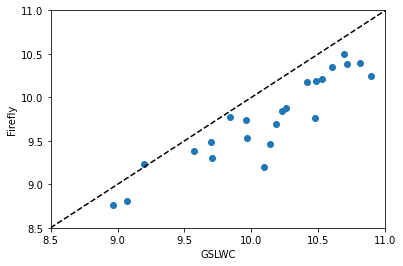

In [9]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table

def calc_mass(plateifu):
    hdu = fits.open('./data2/manga_firefly-v2_4_3-STELLARPOP.fits')
    PLATEIFU_all = hdu[1].data['PLATEIFU']
    
    my_galaxy = np.where(PLATEIFU_all==plateifu)[0]
    # print(hdu['SPATIAL_INFO'].data[my_galaxy][0,:,0])
    remove_nan = ~np.isnan(hdu['SPATIAL_INFO'].data[my_galaxy][0,:,0])
    vor_bin = hdu['SPATIAL_INFO'].data[my_galaxy][0,:,0][remove_nan]
    logMstar = hdu['STELLAR_MASS_VORONOI'].data[my_galaxy][0,:,0][remove_nan]
    
    vor_labels = np.unique(vor_bin)
    print(vor_labels)
    tot_Mstar = 0
    for v in vor_labels:
        
        ind = np.where(vor_bin==v)[0]
        # print(ind)
        tot_Mstar += np.average(10**logMstar[ind])
        
    return np.log10(tot_Mstar)

t = Table.read('Jellyfish_GSWLC.fits')
plateifu_array = np.asarray(t['plateifu']).astype(str)
M = np.asarray(t['log_M'])
M_ff = np.zeros(M.size)

for i in range(M.size):
    M_ff[i] = calc_mass(plateifu_array[i])
plt.scatter(M, M_ff)
plt.xlim(8.5,11)
plt.ylim(8.5,11)
plt.plot([8.5,11], [8.5,11], 'k--')
plt.xlabel('GSLWC')
plt.ylabel('Firefly')
plt.show()

[WARNING]: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead (DeprecationWarning)
[WARNING]: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead (DeprecationWarning)
[WARNING]: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead (DeprecationWarning)
[WARNING]: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead (DeprecationWarning)
[WARNING]: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead (DeprecationWarning)
[WARNING]: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead (DeprecationWarning)
[WARNING]: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead (DeprecationWarning)
[WARNING]: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead (DeprecationWarning)
[WARNING]: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead (DeprecationWarning)
[WARNING]: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead (Deprecatio

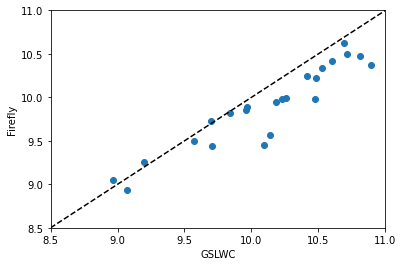

In [10]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table

t = Table.read('Jellyfish_GSWLC.fits')
plateifu_array = np.asarray(t['plateifu']).astype(str)
M = np.asarray(t['log_M'])
M_ff = np.zeros(M.size)

for i in range(M.size):
    a = jf.Mymaps(plateifu=jelly[i], max_radii=5)
    M_ff[i] = a.get_mass()
    
plt.scatter(M, M_ff)
plt.xlim(8.5,11)
plt.ylim(8.5,11)
plt.plot([8.5,11], [8.5,11], 'k--')
plt.xlabel('GSLWC')
plt.ylabel('Firefly')
plt.show()

In [12]:
import mass_sum
print(mass_sum.get_mass(jelly[1]))

10.772222


In [103]:
np.power(10,2)

100